In [2]:
import pandas as pd
import os
import datetime as dt
import spmfunctions.spmfunctions as spm
import warnings
warnings.filterwarnings('ignore')
#%matplotlib inline



In [3]:
pd.set_option('display.max_rows', 500)

In [4]:
intx='i-84-exit27wb'#'ACHD_Chinden-SH16'
yymm=''

df_raw=pd.read_pickle('./{}/df_raw/df_raw{}.pk'.format(intx,yymm))

In [5]:
bin_len=60

df_cnt=df_raw[df_raw.Code.isin([4,5,6])]

df_cnt.loc[df_cnt.Code==4,'Code']='Gap Out'
df_cnt.loc[df_cnt.Code==5,'Code']='Max Out'
df_cnt.loc[df_cnt.Code==6,'Code']='Force Off'
df_cnt.rename({'ID':'Phase'},axis=1,inplace=True)
df_cnt=df_cnt.loc[:, ['TS_start', 'Code', 'Phase','Coord_plan']].set_index('TS_start').groupby(['Phase','Code','Coord_plan'])
df_cnt=df_cnt.resample('%sT'%bin_len).count()
df_cnt=df_cnt.loc[:, 'Code'].unstack(level=['Phase','Code']).fillna(0)
df_cnt=df_cnt[df_cnt.sum(axis=1)>0]
df_cnt=df_cnt.reset_index().sort_values(['TS_start','Coord_plan']).reset_index(drop=True)#.to_csv('term.csv',index=False)

In [6]:
df_cnt.head(500)

Phase Coord_plan            TS_start       1               2               4  \
Code                                 Gap Out Max Out Gap Out Max Out Gap Out   
0            0.0 2024-09-01 00:00:00    36.0    11.0    51.0    21.0    51.0   
1            0.0 2024-09-01 01:00:00    26.0    16.0    36.0    28.0    49.0   
2            0.0 2024-09-01 02:00:00    23.0    30.0    16.0    41.0    23.0   
3            0.0 2024-09-01 03:00:00    14.0    37.0     5.0    49.0    12.0   
4            0.0 2024-09-01 04:00:00     7.0    41.0     4.0    47.0    19.0   
5            0.0 2024-09-01 05:00:00    10.0    41.0     7.0    47.0    13.0   
6            0.0 2024-09-01 06:00:00    18.0    18.0    35.0    26.0    52.0   
7            0.0 2024-09-01 08:00:00    44.0     6.0    45.0     5.0    39.0   
8            0.0 2024-09-01 09:00:00    24.0    14.0    21.0    17.0    31.0   
9            0.0 2024-09-01 10:00:00    43.0     5.0    39.0     9.0    48.0   
10           0.0 2024-09-01 11:00:00    44.0     4.0    34.0     6.0    48.0   
11           0.0 2024-09-01 12:00:00    48.0     1.0    41.0     2.0    49.0   
12           0.0 2024-09-01 13:00:00    50.0     0.0    43.0     4.0    41.0   
13           0.0 2024-09-01 14:00:00    41.0     6.0    34.0     5.0    41.0   
14           0.0 2024-09-01 15:00:00    39.0     7.0    30.0     9.0    36.0   
15           0.0 2024-09-01 16:00:00    35.0     6.0    28.0    11.0    33.0   
16           0.0 2024-09-01 17:00:00    32.0     8.0    26.0    13.0    33.0   
17           0.0 2024-09-01 18:00:00    22.0    17.0    26.0    12.0    29.0   
18           0.0 2024-09-01 19:00:00    16.0    19.0    26.0    10.0    26.0   
19           0.0 2024-09-01 20:00:00    35.0     9.0    38.0     2.0    39.0   
20           0.0 2024-09-01 21:00:00    62.0     2.0    53.0     0.0    65.0   
21           0.0 2024-09-01 23:00:00    63.0     3.0    63.0     7.0    61.0   
22           0.0 2024-09-02 00:00:00    40.0    10.0    49.0    22.0    49.0   
23           0.0 2024-09-02 01:00:00    25.0    23.0    21.0    38.0    31.0   
24           0.0 2024-09-02 02:00:00    12.0    33.0    14.0    41.0    27.0   
25           0.0 2024-09-02 03:00:00    10.0    39.0     4.0    49.0    13.0   
26           0.0 2024-09-02 04:00:00     6.0    44.0     4.0    49.0    14.0   
27           0.0 2024-09-02 05:00:00    13.0    31.0     9.0    41.0    23.0   
28           0.0 2024-09-02 06:00:00    28.0    16.0    38.0    26.0    48.0   
29           0.0 2024-09-02 07:00:00    42.0     1.0    56.0    12.0    66.0   
30           0.0 2024-09-02 08:00:00    53.0     2.0    46.0     2.0    44.0   
31           0.0 2024-09-02 09:00:00    32.0    11.0    31.0    11.0    37.0   
32           0.0 2024-09-02 10:00:00    48.0     2.0    41.0     9.0    45.0   
33           0.0 2024-09-02 11:00:00    50.0     0.0    41.0     1.0    57.0   
34           0.0 2024-09-02 12:00:00    49.0     3.0    43.0     2.0    55.0   
35           0.0 2024-09-02 13:00:00    47.0     2.0    45.0     0.0    53.0   
36           0.0 2024-09-02 14:00:00    42.0     5.0    39.0     3.0    45.0   
37           0.0 2024-09-02 15:00:00    30.0    12.0    30.0     9.0    31.0   
38           0.0 2024-09-02 16:00:00    33.0     8.0    38.0     4.0    37.0   
39           0.0 2024-09-02 17:00:00    27.0    13.0    19.0    20.0    33.0   
40           0.0 2024-09-02 18:00:00    16.0    21.0    27.0    10.0    29.0   
41           0.0 2024-09-02 19:00:00    24.0    15.0    26.0    12.0    30.0   
42           0.0 2024-09-02 20:00:00    36.0     8.0    35.0     8.0    38.0   
43           0.0 2024-09-02 21:00:00    64.0     1.0    55.0     2.0    64.0   
44           0.0 2024-09-02 23:00:00    55.0     7.0    61.0     8.0    59.0   
45           0.0 2024-09-03 00:00:00    42.0    11.0    47.0    19.0    50.0   
46           0.0 2024-09-03 01:00:00    26.0    20.0    28.0    29.0    42.0   
47           0.0 2024-09-03 02:00:00    24.0    24.0    18.0    37.0    28.0   


In [12]:
df_ph = df_cnt.T.reset_index().groupby('Phase').sum().T.iloc[1:,:]

In [52]:
df_cnt.loc[idx,(p,t)]

1       6.0
2       0.0
3      18.0
4      19.0
5       7.0
       ... 
818     7.0
819     7.0
820     1.0
821     0.0
822     0.0
Name: (1, Force Off), Length: 820, dtype: float64

In [13]:


df_pct=df_cnt.copy()
for p,t in df_pct.columns:
    if p in ['Coord_plan','TS_start']:
        continue
    idx=df_ph.loc[:,p]>0
    df_pct.loc[idx,(p,t)] = df_cnt.loc[idx,(p,t)]/df_ph.loc[idx,p]

In [15]:
df_pct.head(500)

Phase Coord_plan            TS_start         1                             2  \
Code                                 Force Off   Gap Out   Max Out Force Off   
0           30.0 2024-05-01 00:00:00       0.0       1.0       0.0       0.0   
1           30.0 2024-05-01 01:00:00       0.0       1.0       0.0       0.0   
2           30.0 2024-05-01 02:00:00       0.0       1.0       0.0       0.0   
3           30.0 2024-05-01 03:00:00       0.0       1.0       0.0       0.0   
4           30.0 2024-05-01 04:00:00       0.0       1.0       0.0       0.0   
5           30.0 2024-05-01 05:00:00       0.0       1.0       0.0       0.0   
6           30.0 2024-05-01 06:00:00       0.0  0.966667  0.033333       0.0   
7           30.0 2024-05-01 07:00:00       0.0  0.588235  0.411765       0.0   
8           30.0 2024-05-01 08:00:00       0.0  0.823529  0.176471       0.0   
9           30.0 2024-05-01 09:00:00       0.0       1.0       0.0       0.0   
10          30.0 2024-05-01 10:00:00       0.0       1.0       0.0       0.0   
11          30.0 2024-05-01 11:00:00       0.0       1.0       0.0       0.0   
12          30.0 2024-05-01 12:00:00       0.0       1.0       0.0       0.0   
13          30.0 2024-05-01 13:00:00       0.0       1.0       0.0       0.0   
14          30.0 2024-05-01 14:00:00       0.0       1.0       0.0       0.0   
15          31.0 2024-05-01 15:00:00       0.0  0.117647  0.882353       0.0   
16          31.0 2024-05-01 16:00:00       0.0       0.0       1.0       0.0   
17          31.0 2024-05-01 17:00:00       0.0       0.0       1.0       0.0   
18          31.0 2024-05-01 18:00:00       0.0  0.333333  0.666667       0.0   
19          30.0 2024-05-01 19:00:00       0.0       1.0       0.0       0.0   
20          31.0 2024-05-01 19:00:00       0.0  0.941176  0.058824       0.0   
21          30.0 2024-05-01 20:00:00       0.0       1.0       0.0       0.0   
22          30.0 2024-05-01 21:00:00       0.0       1.0       0.0       0.0   
23          30.0 2024-05-01 22:00:00       0.0       1.0       0.0       0.0   
24          30.0 2024-05-01 23:00:00       0.0       1.0       0.0       0.0   
25          30.0 2024-05-02 00:00:00       0.0       1.0       0.0       0.0   
26          30.0 2024-05-02 01:00:00       0.0       1.0       0.0       0.0   
27          30.0 2024-05-02 02:00:00       0.0       1.0       0.0       0.0   
28          30.0 2024-05-02 03:00:00       0.0       1.0       0.0       0.0   
29          30.0 2024-05-02 04:00:00       0.0       1.0       0.0       0.0   
30          30.0 2024-05-02 05:00:00       0.0       1.0       0.0       0.0   
31          30.0 2024-05-02 06:00:00       0.0       1.0       0.0       0.0   
32          30.0 2024-05-02 07:00:00       0.0  0.647059  0.352941       0.0   
33          30.0 2024-05-02 08:00:00       0.0  0.666667  0.333333       0.0   
34          30.0 2024-05-02 09:00:00       0.0       1.0       0.0  0.041667   
35          30.0 2024-05-02 10:00:00       0.0       1.0       0.0       0.0   
36          30.0 2024-05-02 11:00:00       0.0       1.0       0.0       0.0   
37          30.0 2024-05-02 12:00:00       0.0       1.0       0.0       0.0   
38          30.0 2024-05-02 13:00:00       0.0       1.0       0.0       0.0   
39          30.0 2024-05-02 14:00:00       0.0       1.0       0.0       0.0   
40          31.0 2024-05-02 14:00:00       0.0       1.0       0.0       0.0   
41          31.0 2024-05-02 15:00:00       0.0       0.0       1.0       0.0   
42          31.0 2024-05-02 16:00:00       0.0  0.117647  0.882353       0.0   
43          31.0 2024-05-02 17:00:00       0.0       0.0       1.0       0.0   
44          31.0 2024-05-02 18:00:00       0.0  0.684211  0.315789       0.0   
45          30.0 2024-05-02 19:00:00       0.0       1.0       0.0       0.0   
46          31.0 2024-05-02 19:00:00       0.0       1.0       0.0       0.0   
47          30.0 2024-05-02 20:00:00       0.0       1.0       0.0       0.0   


In [16]:
df_ext=df_raw[((df_raw.Code.isin([3,4,5,6,8,13,151])))&(df_raw.Coord_plan!=254)]
df=df_ext.groupby(['Cycle_start','Code','ID']).count().drop('Coord_plan',axis=1).unstack(['Code','ID']).fillna(0)
df.columns=df.columns.droplevel(0)
df.columns=[f'{c[0]}_{c[1]}' for c in df.columns]
df=df.reset_index()
df[(df.loc[:,'13_2']>0)&(df.loc[:,'13_6']>0)&(df.loc[:,'6_2']>0)]

KeyError: '13_2'

In [18]:
df.head(500)

,Cycle_start,4_2,4_4,4_6,4_7,8_2,8_4,8_6,8_7,4_1,...,5_6,5_2,5_1,5_4,5_7,6_2,6_4,6_7,6_1,6_6
0,2024-05-01 00:00:30.400,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2024-05-01 00:02:29.600,3.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2024-05-01 00:10:53.900,2.0,1.0,1.0,0.0,2.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2024-05-01 00:19:20.200,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2024-05-01 00:21:39.000,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2024-05-01 00:24:22.400,2.0,1.0,1.0,0.0,2.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2024-05-01 00:33:18.500,2.0,1.0,1.0,0.0,2.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2024-05-01 00:36:22.400,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2024-05-01 00:42:27.700,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2024-05-01 00:43:21.600,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [119]:
df_fo_ext = df_raw[(((df_raw.Code.isin([6,13]))&(df_raw.ID==8))|(df_raw.Code==151))&(df_raw.Coord_plan!=254)]

In [121]:
df_go = df_fo_ext.groupby(['Cycle_start','Code']).min().unstack()
df_go = df_go.loc[:,('TS_start')]
df_delt = (df_go.loc[:,151] - df_go.loc[:,13]).dt.total_seconds()
df_delt = df_delt.fillna(0).clip(lower=0)
df_delt.name = 'Delt'
df_delt = pd.merge(df_delt, df_raw.loc[:,['Cycle_start','Coord_plan']],left_index=True,right_on='Cycle_start',how='left').drop_duplicates().set_index('Cycle_start')

In [122]:
pl = df_delt.plot(backend='plotly')

In [123]:
pl.write_html('plot.html')

<AxesSubplot:xlabel='Cycle_start'>

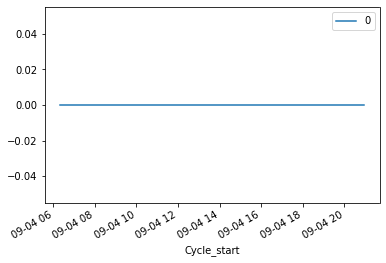

In [89]:
spm.filter_date(df_delt.clip(lower=0),'9-4-2023','9-4-2023').plot()